In [32]:
import numpy as np
import pandas as pd
from pandas import Series ,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1. Read the data into python


In [33]:
data=pd.read_csv(r"C:\Users\hp\Desktop\Data Science Activites\lark regression activity week10\week10.csv")


In [34]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843
2007,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
2008,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
2009,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [35]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749


In [36]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

# 2. Check for null values

In [37]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

# Examine the variables ‘Hardness’, ‘Sulfate3.’, and ‘Organic_carbon’ andcomment on your observations.comment on your observation

In [52]:
data[['Hardness','Sulfate','Organic_carbon']].describe()
# commnets,‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ are continous numeric variables.

,Hardness,Sulfate,Organic_carbon
count,2011.000000,2011.000000,2011.000000
mean,195.968072,333.224672,14.357709
std,32.635085,41.205172,3.324959
min,73.492234,129.000000,2.200000
25%,176.744938,307.632511,12.124105
50%,197.191839,332.232177,14.322019
75%,216.441070,359.330555,16.683049
max,317.338124,481.030642,27.006707


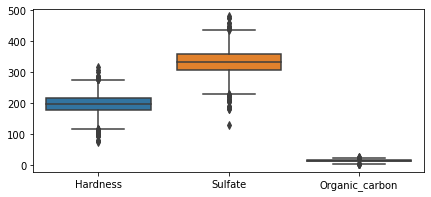

In [53]:
plt.figure(figsize=(7,3))
sns.boxplot(data=data[['Hardness','Sulfate','Organic_carbon']])#checking outliers
plt.show()
# comments,There are outliers for hardness and sulphate.

In [54]:
data[['Hardness','Sulfate','Organic_carbon']].isna().sum()
#comments, all of theese three have no null values

Hardness          0
Sulfate           0
Organic_carbon    0
dtype: int64

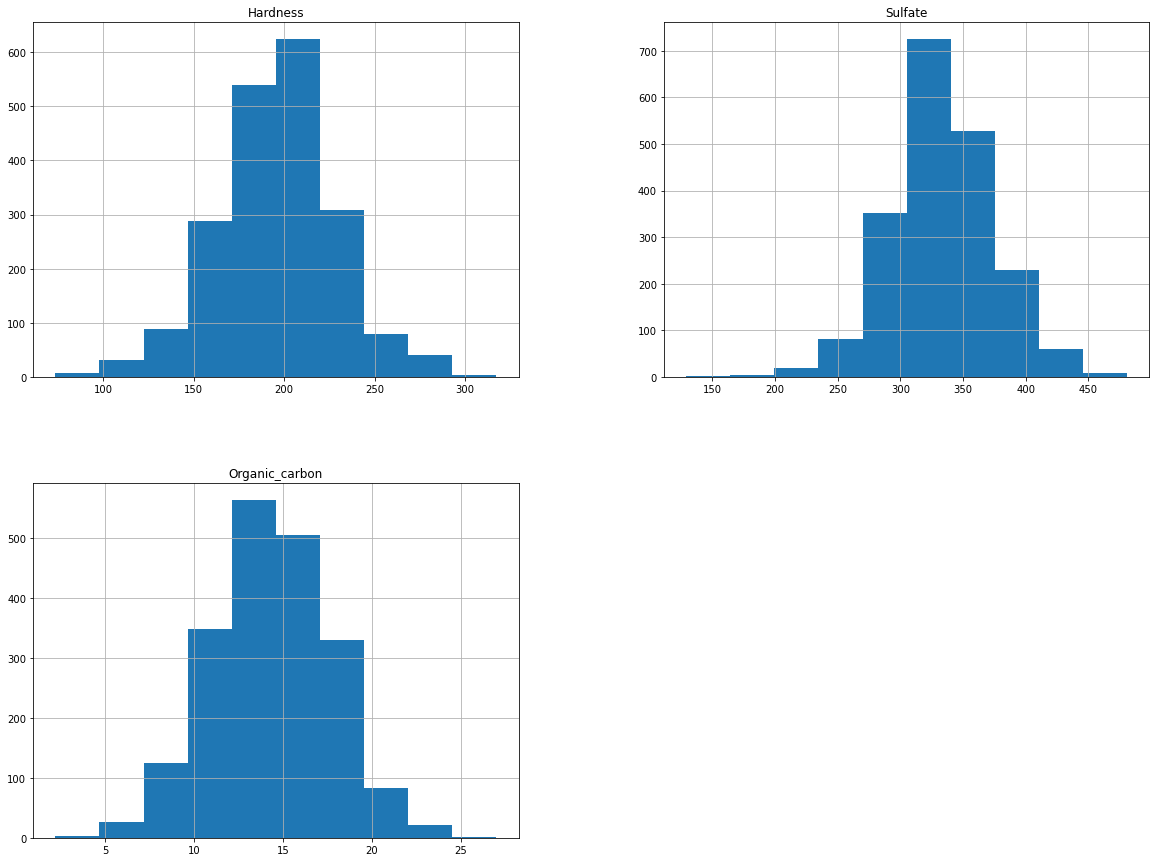

In [47]:
#Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and comment on your observations.
data[['Hardness','Sulfate','Organic_carbon']].hist(figsize = (20,15))
plt.show()
#comments,all are normal distributed

In [59]:
print(data['Hardness'].unique())
print(data['Sulfate'].unique())
print(data['Organic_carbon'].unique())

[214.3733941  181.1015092  188.3133238  ...  94.81254522 186.6590397
 193.6817355 ]
[356.8861356 310.1357375 326.6783629 ... 258.9306004 345.7002573
 359.9485744]
[18.4365245  11.55827944  8.39973464 ... 16.17275544 12.06761957
 13.89441852]


# 4. Carry out correlation analysis on the dataset and find the correlation factor
between
a. ph and Chloramines
b. ph and Conductivity
What do we infer from this correlation value

<AxesSubplot:>

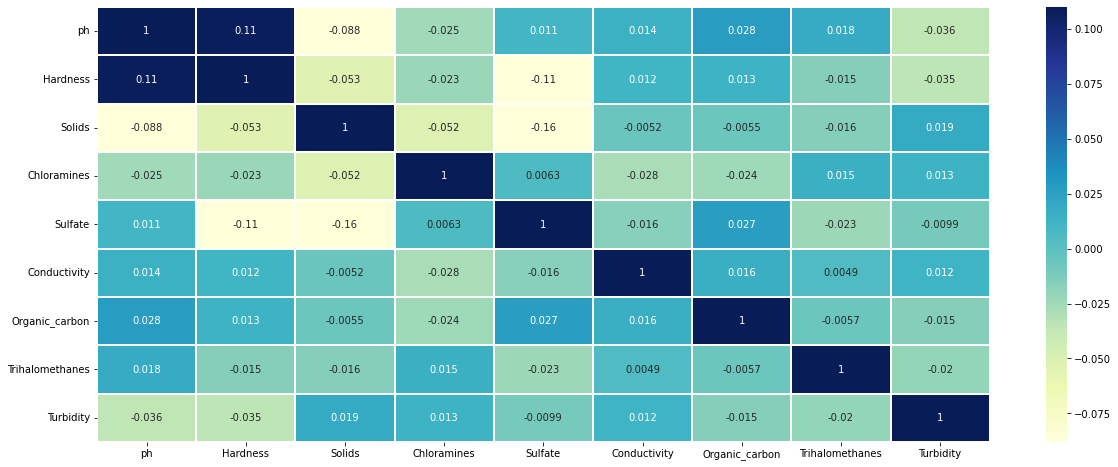

In [60]:
corrmatrix = data.corr()
plt.subplots(figsize = (20,8))
sns.heatmap(corrmatrix,vmin= -0.088,vmax = 0.11,annot=True,linewidth = 0.2,cmap='YlGnBu')

ph and Chloramines has a low negative corelation of -0.025
ph and Conductivity has a low corelation of 0.014

In [61]:
import scipy 
from scipy.stats.stats import pearsonr

In [65]:
ph = data['ph']
ch = data['Chloramines']
co = data['Conductivity']

pearson_coefficent, p_value = pearsonr(ph,ch)
print('Pearson Coorelation Coefficent between ph and Chloramines: %0.3f'%pearson_coefficent)
pearson_coefficent, p_value = pearsonr(ph,co)
print('Pearson Coorelation Coefficent between ph and Conductivity : %0.3f'%pearson_coefficent)

Pearson Coorelation Coefficent between ph and Chloramines: -0.025
Pearson Coorelation Coefficent between ph and Conductivity : 0.014
